In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from openlst_tools.openlst import OpenLst

lst = OpenLst('/dev/ttyUSB0', hwid=0x0171, rtscts=True, quiet=True)

lst.open()


In [8]:
f_ref = 27e6

rssis = np.zeros(15)

bandwidths = [f_ref / (8*(4 + m)*2**e) for e in range(4) for m in range(4)]
bandwidths = sorted(bandwidths)
bandwidths = np.array(bandwidths)[:-1] # skip last one, getting weird results

lst.reboot()
time.sleep(1)

for i in range(len(bandwidths)):
    # Retry in case of error
    while True:
        try:
            bw = bandwidths[i]
            _, bw, _, _ = lst.set_rf_params(chan_bw=bw)
            time.sleep(0.5)

            rssi = 0

            for _ in range(10):
                rssi += lst.get_telem()["rssi_cont_dbm"] / 10
                time.sleep(0.1)
            
            rssis[i] = rssi
            bandwidths[i] = bw

            print(f"BW={bw}, RSSI={rssi}")

            break
        except:
            print("It broke, rebooting")
            lst.reboot()
            time.sleep(1)

nf_total = 2.2
nf_cc1110 = 7
lna_gain = 15

# If not bypassed
rssi_expected = 10*np.log10(bandwidths) - 173.8 + nf_total + lna_gain

# If bypassed
# rssi_expected = 10*np.log10(bandwidths) - 173.8 + nf_cc1110

BW=60267.857142857145, RSSI=-105.60000000000002
BW=70312.5, RSSI=-105.60000000000001
BW=84375.0, RSSI=-105.7
BW=105468.75, RSSI=-104.89999999999999
BW=120535.71428571429, RSSI=-105.4
BW=140625.0, RSSI=-103.10000000000001
BW=168750.0, RSSI=-102.69999999999999
BW=210937.5, RSSI=-101.1
BW=241071.42857142858, RSSI=-98.89999999999999
BW=281250.0, RSSI=-98.85
BW=337500.0, RSSI=-98.1
BW=421875.0, RSSI=-100.05
BW=482142.85714285716, RSSI=-98.25000000000001
BW=562500.0, RSSI=-97.39999999999999
BW=675000.0, RSSI=-97.39999999999999


Text(0.5, 1.0, 'Receiver Noise Floor')

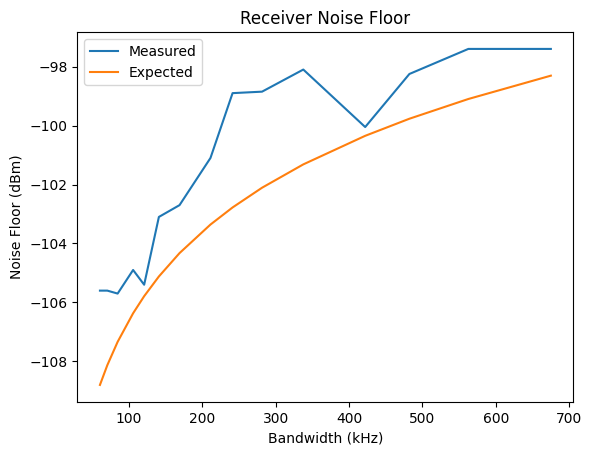

In [9]:
plt.plot(bandwidths/1e3, rssis, label="Measured")
plt.plot(bandwidths/1e3, rssi_expected, label="Expected")

plt.xlabel("Bandwidth (kHz)")
plt.ylabel("Noise Floor (dBm)")
plt.legend()
plt.title("Receiver Noise Floor")